# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

df = pd.read_csv('creditcard.csv')

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
df.duplicated().sum()

1081

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.duplicated().sum()

0

In [5]:
corr_matrix = df.corr()
corr_matrix['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

In [6]:
X = df[['V11', 'V4', 'V2', 'V5', 'V9', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17']]
y = df['Class']

In [7]:
X.dtypes

V11    float64
V4     float64
V2     float64
V5     float64
V9     float64
V1     float64
V18    float64
V7     float64
V3     float64
V16    float64
V10    float64
V12    float64
V14    float64
V17    float64
dtype: object

In [15]:
# 283253 transações normais e 473 transações fraudulentas.
# Feature desbalanceada.

np.bincount(y)

array([283253,    473], dtype=int64)

In [18]:
# 0.001667% transações fraudulentas

y.value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [102]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Class', y='Amount',data = sample_df,palette= ["#0000FF","#FF0000"])
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

0

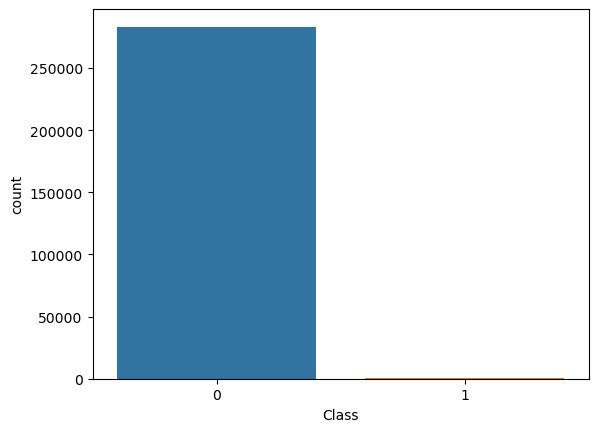

In [19]:
sns.countplot(y);

In [20]:
# Processo para igualar a feature

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_over, y_over = smote.fit_resample(X, y)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

In [22]:
# Porcentagem da feature após o processo de SMOTE

y_over.value_counts(normalize=True)

0    0.5
1    0.5
Name: Class, dtype: float64

In [23]:
# número de bons e maus pagadores igualado. 

np.bincount(y_over)

array([283253, 283253], dtype=int64)

In [24]:
# Normalização dos dados

from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression().fit(X_train_transformed, y_train)
reg.score(X_test_transformed, y_test)

0.9325809640369045

In [54]:
reg_pred = reg.predict(X_test_transformed)

In [128]:
from sklearn.metrics import confusion_matrix

def plot_matrix(confusion, name,color_map):
    plt.figure(figsize = (7,6))
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in
    confusion.flatten()]
    
    group_percentages = ["{0:.1%}".format(value) for value in
    confusion.flatten()/np.sum(confusion)]
    
    #Getting the labels
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    
    #Setting the labels
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusion, annot=labels,vmax=20,annot_kws={"size": 15}, fmt='', cmap=color_map)
    ax.set_title(f'{name}\n',fontdict={'fontsize':25});
    ax.set_xlabel('\nPredicted Values',fontsize=16)
    ax.set_ylabel('Actual Values ',fontsize=16);
    
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Legitimate','Fraudulent'],fontsize=15)
    ax.yaxis.set_ticklabels(['Legitimate','Fraudulent'],fontsize=15)
    
    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [124]:
reg_matrix = confusion_matrix(y_true = y_test, y_pred = reg_pred)

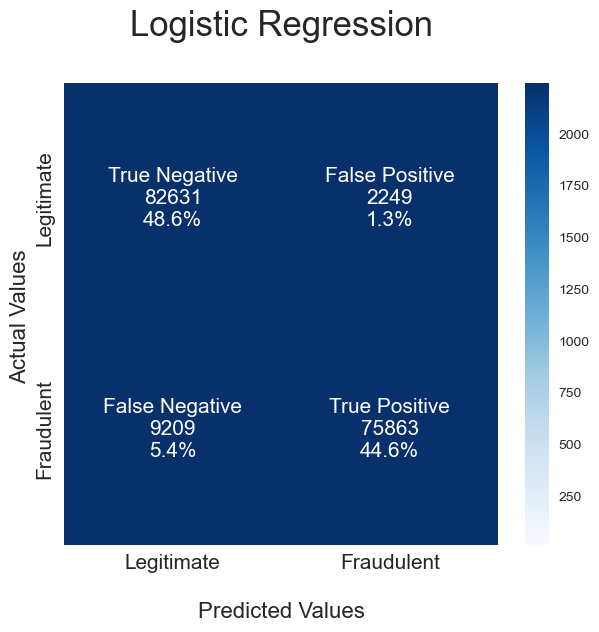

In [126]:
plot_matrix(reg_matrix,'Logistic Regression','Blues')

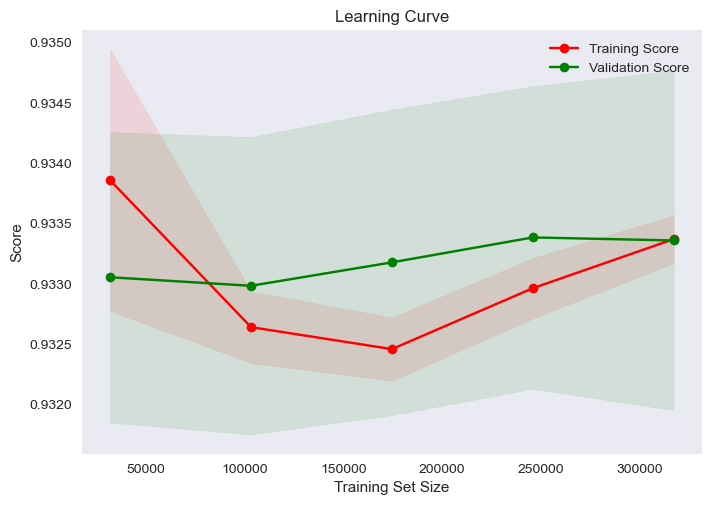

In [129]:
from sklearn.model_selection import learning_curve

X, y = X_train_transformed, y_train

model = LogisticRegression()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Validation Score")
plt.legend(loc="best")

plt.show()

# Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [95]:
rfc.score(X_test, y_test)

0.9997646394276031

In [96]:
rfc_pred = rfc.predict(X_test)

In [115]:
rf_matrix = confusion_matrix(y_true = y_test, y_pred = rfc_pred)

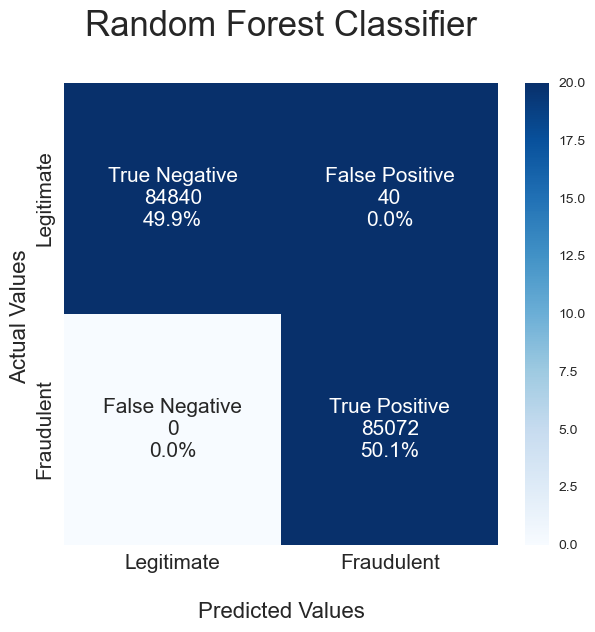

In [121]:
plot_matrix(rf_matrix,'Random Forest Classifier','Blues')

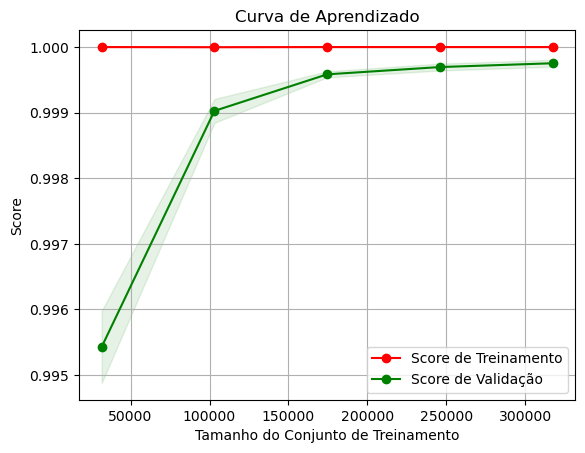

In [98]:
X, y = X_train_transformed, y_train

model = RandomForestClassifier()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")

plt.show()

# XGBClassifier

In [99]:
from xgboost import XGBClassifier

xgb_class = XGBClassifier()

xgb_class.fit(X_train_transformed, y_train)

xgb_class_pred = xgb_class.predict(X_test_transformed)

accuracy = (xgb_class_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9991880060252306


In [122]:
xgb_matrix = confusion_matrix(y_true = y_test, y_pred = xgb_class_pred)

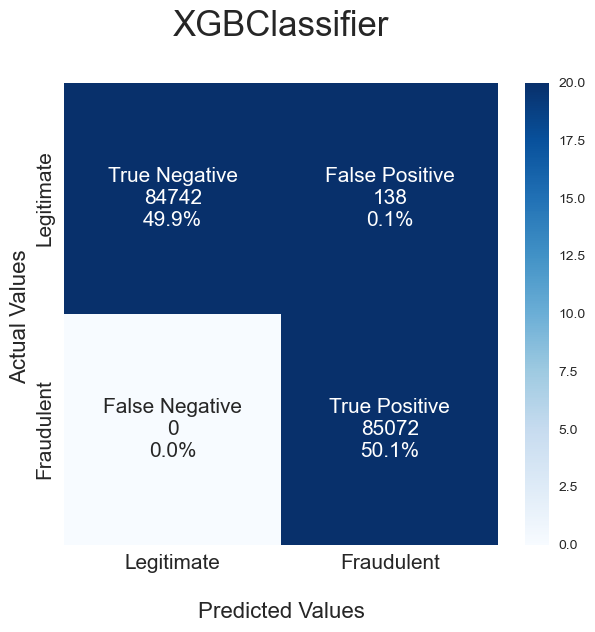

In [130]:
plot_matrix(xgb_matrix,'XGBClassifier','Blues')

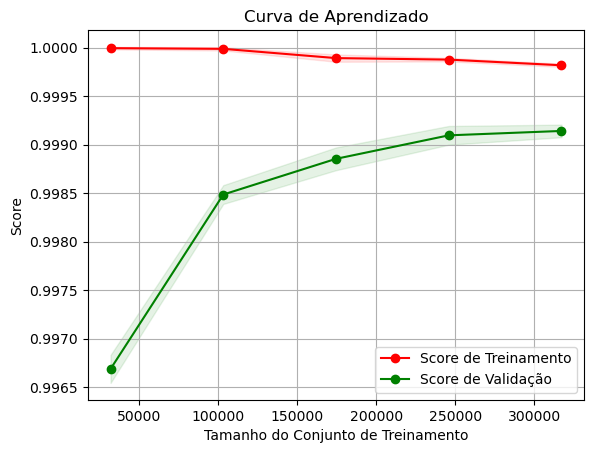

In [100]:
X, y = X_train_transformed, y_train

model = XGBClassifier()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")

plt.show()

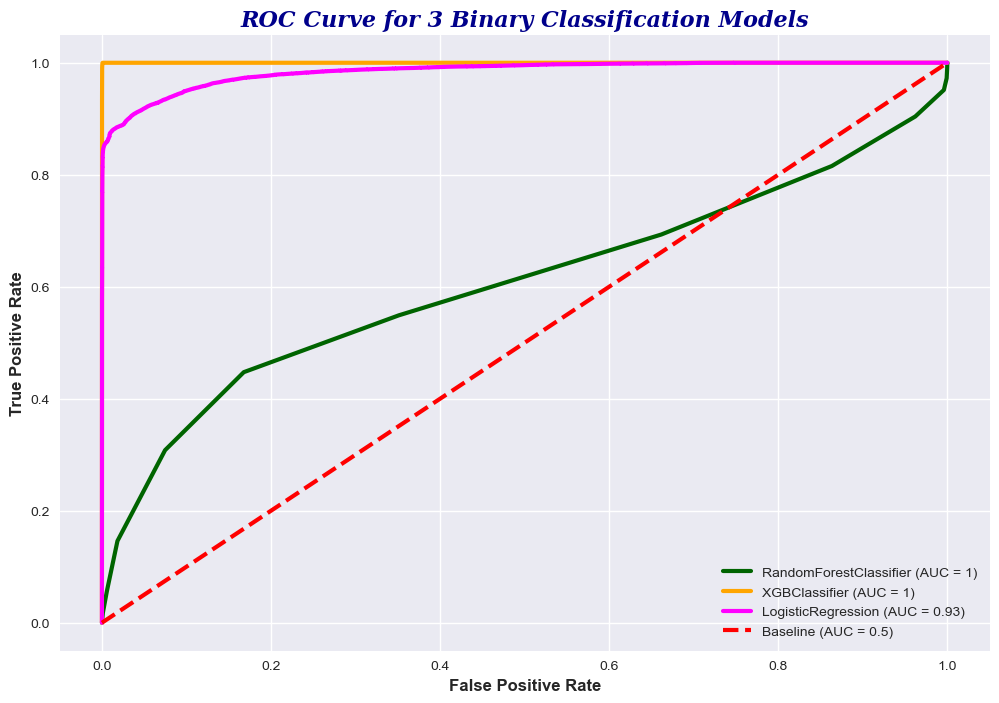

In [101]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

plt.style.use('seaborn')
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(rfc, X_test_transformed, y_test, color='darkgreen', linewidth=3, ax=ax, label='RandomForestClassifier (AUC = 1)')
plot_roc_curve(xgb_class, X_test_transformed, y_test, color='orange', linewidth=3, ax=ax, label='XGBClassifier (AUC = 1)')
plot_roc_curve(reg, X_test_transformed, y_test, color='magenta', linewidth=3, ax=ax, label='LogisticRegression (AUC = 0.93)')
plt.plot([0, 1], [0, 1], ls='--', color='red', linewidth=3, label='Baseline (AUC = 0.5)')
ax.legend(loc='lower right')
ax.set_title('ROC Curve for 3 Binary Classification Models', fontdict=font1)
ax.set_xlabel('False Positive Rate', fontdict=font2)
ax.set_ylabel('True Positive Rate', fontdict=font2)
plt.show()

In [ ]:
# Clearly the XGBClassifier model has excellent performance and should be the model used.